In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

Classes: ['Cyst', 'Normal', 'Stone', 'Tumor']
Number of classes: 4
Total images: 12446

Images per class:
Cyst: 3709
Normal: 5077
Stone: 1377
Tumor: 2283


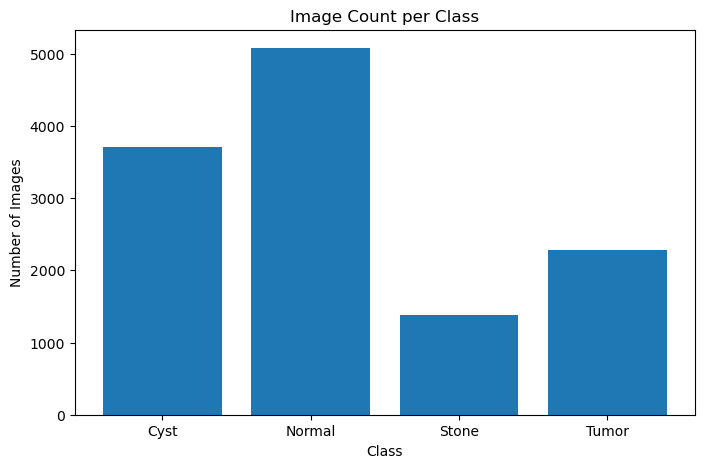

In [2]:
dataset_path = "CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone" 
class_names = []
image_counts = {}

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    
    if os.path.isdir(class_path):
        class_names.append(class_name)
        image_counts[class_name] = len(os.listdir(class_path))

print("Classes:", class_names)
print("Number of classes:", len(class_names))
print("Total images:", sum(image_counts.values()))
print("\nImages per class:")
for k, v in image_counts.items():
    print(f"{k}: {v}")


plt.figure(figsize=(8,5))
plt.bar(image_counts.keys(), image_counts.values())
plt.title("Image Count per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

In [3]:
image_shapes = []

for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    
    for img_name in os.listdir(class_path)[:50]:  # sample first 50 images
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        
        if img is not None:
            image_shapes.append(img.shape[:2])  # (height, width)

image_shapes = np.array(image_shapes)

print("Image Height - Min:", image_shapes[:,0].min(),
      "Max:", image_shapes[:,0].max())

print("Image Width  - Min:", image_shapes[:,1].min(),
      "Max:", image_shapes[:,1].max())


Image Height - Min: 512 Max: 1001
Image Width  - Min: 512 Max: 1236


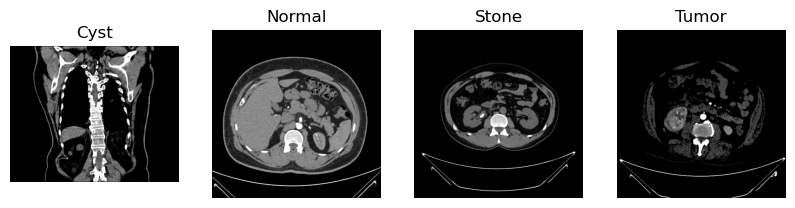

In [4]:
plt.figure(figsize=(10,6))

for i, class_name in enumerate(class_names):
    class_path = os.path.join(dataset_path, class_name)
    img_name = os.listdir(class_path)[0]
    img_path = os.path.join(class_path, img_name)
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(1, len(class_names), i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")

plt.show()
